In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import linear_model
import random
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d
from sklearn.linear_model import LinearRegression

In [4]:
# Code ở đây cũng được
df = pd.read_csv('Data_GPA_Stanford.txt', sep="\t")

In [5]:
df['IQ'] = df['IQ'].apply(lambda x: float(x + random.randint(-5, 5)))

In [11]:


# Phương trình z = ax + by + c

# Data

dataIQ = np.array([df['IQ']]).T
dataHour = np.array([df['hours per day']]).T
GPA = np.array([df['GPA']]).T
ones = np.ones((dataIQ.shape[0], 1), dtype = np.int8)

# Gộp data
data = np.concatenate((dataIQ, dataHour, ones), axis = 1)




array([[ 97.,  16.,   1.],
       [111.,  14.,   1.],
       [ 95.,   4.,   1.],
       [ 93.,   8.,   1.],
       [139.,  13.,   1.],
       [ 97.,  15.,   1.],
       [141.,   8.,   1.],
       [101.,   4.,   1.],
       [100.,  16.,   1.],
       [126.,  11.,   1.],
       [119.,  10.,   1.],
       [140.,   1.,   1.],
       [127.,   9.,   1.],
       [128.,   3.,   1.],
       [147.,  13.,   1.],
       [101.,   5.,   1.],
       [130.,   2.,   1.],
       [ 90.,  10.,   1.],
       [ 90.,   2.,   1.],
       [129.,  11.,   1.],
       [147.,  11.,   1.],
       [108.,  16.,   1.],
       [106.,   4.,   1.],
       [118.,  12.,   1.],
       [127.,   1.,   1.],
       [137.,  15.,   1.],
       [136.,   5.,   1.],
       [107.,   3.,   1.],
       [ 91.,   1.,   1.],
       [125.,  12.,   1.],
       [143.,  14.,   1.],
       [140.,   8.,   1.],
       [107.,  15.,   1.],
       [ 89.,   5.,   1.],
       [101.,   3.,   1.],
       [ 90.,   5.,   1.],
       [139.,   5.,   1.],
 

<IPython.core.display.Javascript object>


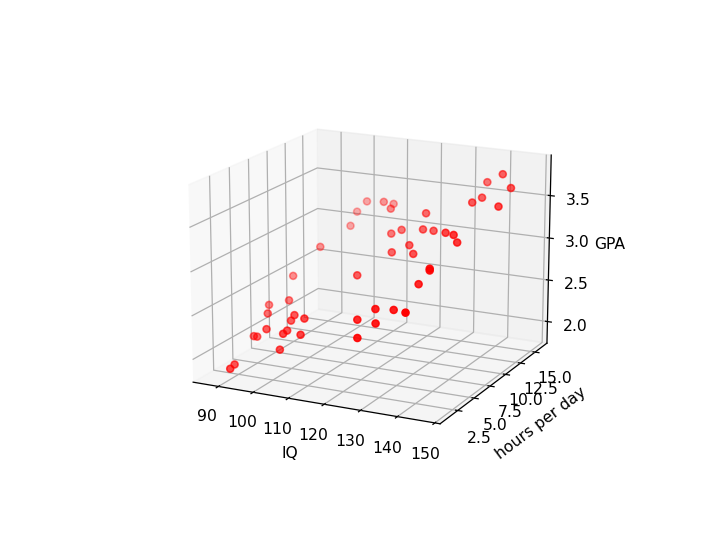

Text(0.5, 0, 'GPA')

In [12]:
# Visualization data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y = GPA
x1 = dataIQ
x2 = dataHour

ax.scatter(x1, x2, y, c="r", marker="o")

ax.set_xlabel("IQ")
ax.set_ylabel("hours per day")
ax.set_zlabel("GPA")

In [17]:
# Linear regression
data_linear = np.concatenate((dataIQ, dataHour), axis = 1)
LR = linear_model.LinearRegression()
LR.fit(data_linear, GPA)
x0_gd = np.linspace(70, 140, 2)
y0_gd = np.linspace(2, 20, 2)
z_sklearn = LR.intercept_[0] + LR.coef_[0][0] * x0_gd + LR.coef_[0][1] * y0_gd
z_sklearn

array([1.53334721, 4.17463118])

In [32]:
# Random initial plane
A_init = np.array([[0.3], [0.3], [0.5]])
z_init = A_init[0] * x0_gd + A_init[1] * y0_gd + A_init[2]
z_init



array([22.1, 48.5])

In [35]:
%matplotlib notebook
def cost(x):
    m = A.shape[0]
    return 0.5/m * np.linalg.norm(A.dot(x) - b, 2)**2

def grad(x):
    m = A.shape[0]
    return 1/m * A.T.dot(A.dot(x)-b)

def check_grad(x):
    eps = 1e-4
    g = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        g[i] = (cost(x1) - cost(x2)) / (2*eps) # Cong thuc f'(x) = (f(x + eps) - f(x - eps)) / 2eps
    g_grad = grad(x)
    if np.linalg.norm(g - g_grad) > 1e-7:
        print("Warning: Check gradient function!")



def gradient_descent(x_init, learning_rate, iteration):
    x_list = [x_init]
    m = A.shape[0]

    for i in range(iteration):
        x_new = x_list[-1] - learning_rate*grad(x_list[-1])

        if np.linalg.norm(grad(x_new))/ len(x_new) < 0.5: # when to stop GD
            break
        x_list.append(x_new)

    return x_list

iteration = 100
learning_rate = 0.000005
A = data.copy()
b = GPA.copy()
x_list = gradient_descent(x_init, learning_rate, iteration)
x_list

[array([[100],
        [ 10],
        [  1]]),
 array([[93.03065322],
        [ 9.51908178],
        [ 0.94153322]]),
 array([[86.54610589],
        [ 9.0715944 ],
        [ 0.88713335]]),
 array([[80.51263465],
        [ 8.65521237],
        [ 0.8365175 ]]),
 array([[74.89886198],
        [ 8.26777195],
        [ 0.78942245]]),
 array([[69.67559305],
        [ 7.90725994],
        [ 0.74560328]]),
 array([[64.81566385],
        [ 7.57180315],
        [ 0.70483211]]),
 array([[60.29379995],
        [ 7.25965871],
        [ 0.66689694]]),
 array([[56.08648501],
        [ 6.96920498],
        [ 0.63160047]]),
 array([[52.17183857],
        [ 6.69893312],
        [ 0.59875915]]),
 array([[48.52950218],
        [ 6.44743926],
        [ 0.56820221]]),
 array([[45.14053355],
        [ 6.21341718],
        [ 0.53977074]]),
 array([[41.98730806],
        [ 5.99565151],
        [ 0.51331689]]),
 array([[39.05342706],
        [ 5.79301144],
        [ 0.48870309]]),
 array([[36.32363264],
       

In [ ]:

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(dataIQ, dataHour, GPA, c="r", marker="o")

ax.plot_surface(
    np.array([[90, 90], [140, 140]]),
    np.array([[2.5, 15], [2.5, 15]]),
    LR.predict(
        np.array([[90, 90, 140, 140], [2.5, 15, 2.5, 15]]).T
    ).reshape((2, 2)),
    alpha=0.5, cmap='viridis',
)
ax.set_xlabel("IQ")
ax.set_ylabel("hours per day")
ax.set_zlabel("GPA")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12072\3890065217.py:16: RuntimeWarning: invalid value encountered in true_divide
  zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]


<IPython.core.display.Javascript object>


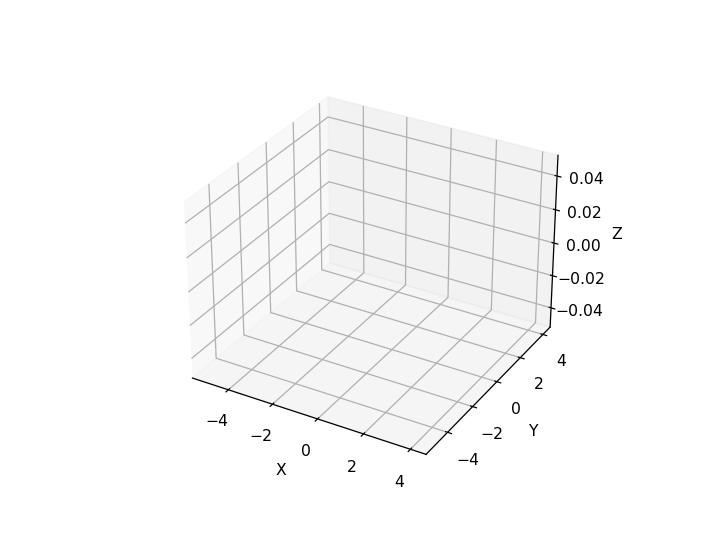

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tạo dữ liệu điểm trên mặt phẳng
point1 = np.array([1, 1, 1])
point2 = np.array([2, 2, 2])
point3 = np.array([3, 3, 3])

# Tạo vector pháp tuyến của mặt phẳng từ 3 điểm đã cho
normal = np.cross(point2 - point1, point3 - point1)

# Tạo lưới mặt phẳng bằng cách tạo các điểm trên mặt phẳng
xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))
d = -point1.dot(normal)
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# Khởi tạo subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ mặt phẳng
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Tạo các điểm A, B, C trên mặt phẳng
points = [point1, point2, point3]
labels = ['A', 'B', 'C']
for point, label in zip(points, labels):
    ax.text(point[0], point[1], point[2], label)

# Thiết lập các trục và tên trục
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Hiển thị đồ thị
plt.show()
